In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
from datetime import datetime

sys.path.append(os.path.abspath(".."))

from common.dataset.config import DatasetPath
from common.dataset.clickstream_generator import generate_clickstream

# Clickstream Dataset

In [2]:
current_dir = os.path.abspath(os.curdir)
base_dir = "/".join(current_dir.split("/")[:-1])
dataset_dir = Path(base_dir).joinpath("data/dataset")

paths = DatasetPath(base_dir=dataset_dir, dataset_name="fashion")
print(paths.base_path)

/Users/hwangyungwan/Library/Mobile Documents/com~apple~CloudDocs/Documents/workspace/lecture/rec_sys/workspace/dataset/fashion


In [8]:
generate_clickstream(
    user_metadata_path=paths.user_metadata_path,
    item_metadata_path=paths.item_metadata_path,
    save_path=paths.interactions_path,
    users_per_partition=1000,
    n_sessions_per_user=5,
    actions=["click", "wishlist", "cart", "purchase"],
    action_weights=[0.8, 0.1, 0.05, 0.05],
    similarity_keys=["category", "style", "color"],
    start_date=datetime(2025, 9, 1),
    seed=42,
)

# Load Dataset

In [9]:
df = pd.read_parquet(paths.interactions_path)

In [10]:
df.shape

(161346, 14)

In [11]:
df.head()

,user_id,item_id,timestamp,action,age,gender,title,color,style,fit,material,season,sleeve,category
0,1,3092,2025-09-21 03:01:00,click,46,F,"트렌디한 스포티룩, 세미오버핏 레깅스 in 여름",아이보리,스포티,세미오버핏,울,여름,7부,레깅스
1,1,8879,2025-09-21 03:02:00,click,46,F,"트렌디한 스포티룩, 슬림핏 레깅스 in 여름",아이보리,스포티,슬림핏,메쉬,여름,롱슬리브,레깅스
2,1,1880,2025-09-21 03:03:00,click,46,F,필수템! 스포티 무드의 간절기용 레깅스,아이보리,스포티,세미오버핏,데님,간절기,숏슬리브,레깅스
3,1,6154,2025-09-21 03:13:00,click,46,F,여름 감성 슬림핏 폴리 레깅스,아이보리,스포티,슬림핏,폴리,여름,롱슬리브,레깅스
4,1,8642,2025-09-21 03:13:00,wishlist,46,F,"트렌디한 스포티룩, 레귤러핏 레깅스 in 겨울",아이보리,스포티,레귤러핏,코튼,겨울,7부,레깅스


# EDA

## Item Frequency

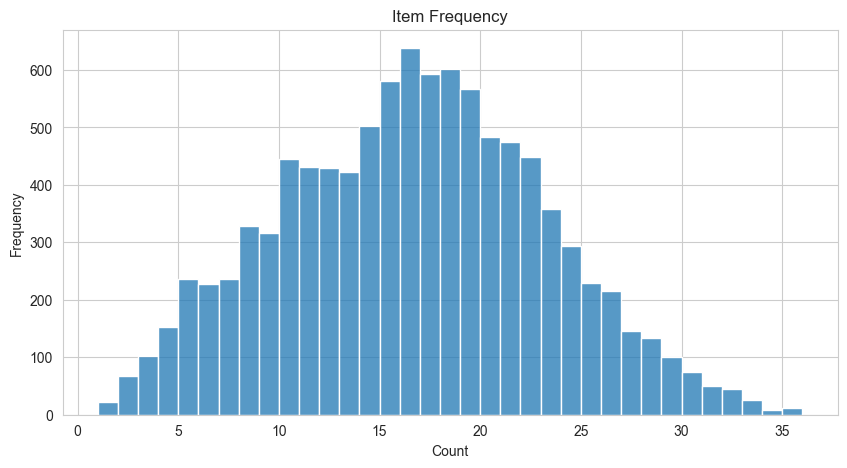

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(x=df["item_id"].value_counts(), binwidth=1)
plt.title("Item Frequency")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()